In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Data Analysis

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
train.shape

(3116945, 22)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [5]:
train.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


## 2.1 Missing values

In [6]:
# display all the missing values in the dataset
train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

### 2.2 >50% missing values

In [7]:
#percentage of missing values per column
missing_values_percentage = train.isnull().mean() * 100
missing_values_percentage

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [8]:
# remove the columns with missing values greater than 50%
columns_to_remove = missing_values_percentage[missing_values_percentage > 50].index.tolist()

In [9]:
train = train.drop(columns=columns_to_remove)

In [10]:
print("Columns removed:", columns_to_remove)
print("Cleaned dataset shape:", train.shape)

Columns removed: ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']
Cleaned dataset shape: (3116945, 17)


In [11]:
train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64

### 2.3 Imputing missing values

In [12]:
# use imputer to fill the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.8,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,c,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,c,w,3.37,8.36,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,t,n,t,a,c,w,12.14,18.81,w,t,g,d,u
3116941,3116941,e,10.88,s,t,w,t,d,c,p,6.65,26.97,w,f,f,d,u
3116942,3116942,p,7.82,x,e,e,f,a,c,w,9.51,11.06,y,t,z,d,a
3116943,3116943,e,9.45,p,i,n,t,e,c,p,9.13,17.77,w,t,p,d,u


In [13]:
train.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## 3 Encoding

In [14]:
# one-hot encoding for column 'class' into 0 and 1
train['class'] = train['class'].map({'e': 0, 'p': 1})

In [15]:
# one-hot encoding for non-numeric columns
train = pd.get_dummies(train, columns=['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color'], drop_first=True)
train

,id,class,cap-diameter,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,...,gill-color_spacing,gill-color_spore-print-color,gill-color_stem-root,gill-color_t,gill-color_u,gill-color_veil-type,gill-color_w,gill-color_x,gill-color_y,gill-color_z
0,0,0,8.8,4.51,15.39,w,f,f,d,a,...,False,False,False,False,False,False,True,False,False,False
1,1,1,4.51,4.79,6.48,o,t,z,d,w,...,False,False,False,False,False,False,False,False,False,False
2,2,0,6.94,6.85,9.93,n,f,f,l,w,...,False,False,False,False,False,False,True,False,False,False
3,3,0,3.88,4.16,6.53,w,f,f,d,u,...,False,False,False,False,False,False,False,False,False,False
4,4,0,5.85,3.37,8.36,w,f,f,g,a,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,0,9.29,12.14,18.81,w,t,g,d,u,...,False,False,False,False,False,False,True,False,False,False
3116941,3116941,0,10.88,6.65,26.97,w,f,f,d,u,...,False,False,False,False,False,False,False,False,False,False
3116942,3116942,1,7.82,9.51,11.06,y,t,z,d,a,...,False,False,False,False,False,False,True,False,False,False
3116943,3116943,0,9.45,9.13,17.77,w,t,p,d,u,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# encode the columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['stem-color', 'has-ring', 'ring-type', 'habitat', 'season']:
    train[col] = encoder.fit_transform(train[col])

In [17]:
train

,id,class,cap-diameter,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,...,gill-color_spacing,gill-color_spore-print-color,gill-color_stem-root,gill-color_t,gill-color_u,gill-color_veil-type,gill-color_w,gill-color_x,gill-color_y,gill-color_z
0,0,0,8.8,4.51,15.39,55,5,18,25,0,...,False,False,False,False,False,False,True,False,False,False
1,1,1,4.51,4.79,6.48,47,18,39,25,3,...,False,False,False,False,False,False,False,False,False,False
2,2,0,6.94,6.85,9.93,46,5,18,36,3,...,False,False,False,False,False,False,True,False,False,False
3,3,0,3.88,4.16,6.53,55,5,18,25,2,...,False,False,False,False,False,False,False,False,False,False
4,4,0,5.85,3.37,8.36,55,5,18,29,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,0,9.29,12.14,18.81,55,18,19,25,2,...,False,False,False,False,False,False,True,False,False,False
3116941,3116941,0,10.88,6.65,26.97,55,5,18,25,2,...,False,False,False,False,False,False,False,False,False,False
3116942,3116942,1,7.82,9.51,11.06,57,18,39,25,0,...,False,False,False,False,False,False,True,False,False,False
3116943,3116943,0,9.45,9.13,17.77,55,18,27,25,2,...,False,False,False,False,False,False,False,False,False,False


## 4 Graphical Represention

### 4.1 Heatmap

c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


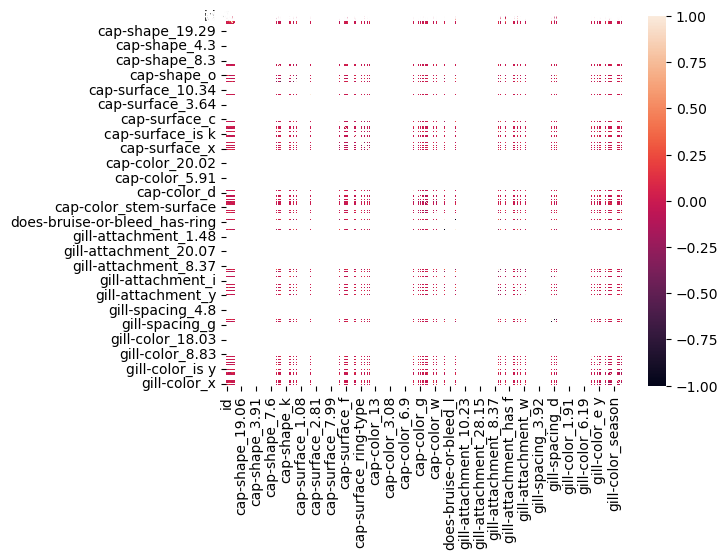

In [18]:
# use 10,000 rows for plotting a heatmap
train_plot = train.head(10000)
corr_matrix = train_plot.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [20]:
sample_df = train.sample(frac=0.01, random_state=42)  # Adjust frac as needed
correlations = sample_df.corr()
print(correlations['class'].sort_values(ascending=False))

class                           1.000000
cap-shape_b                     0.148979
gill-attachment_a               0.147863
gill-color_n                    0.147288
cap-surface_k                   0.140041
                                  ...   
gill-color_spore-print-color         NaN
gill-color_stem-root                 NaN
gill-color_veil-type                 NaN
gill-color_x                         NaN
gill-color_z                         NaN
Name: class, Length: 453, dtype: float64
